In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'C:\\Users\\Selva Kumar E\\Desktop\\IBM_'

In [3]:
data=pd.read_csv("insurance.csv")

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
data.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [9]:
### statistical analysis

In [10]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
data.shape

(1338, 7)

In [12]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [13]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [14]:
data["sex"].unique()

array(['female', 'male'], dtype=object)

In [15]:
data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [16]:
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [17]:
data.mean()

C:\Users\Selva Kumar E\AppData\Local\Temp\ipykernel_5808\531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
data.median()

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [20]:
# mode

In [21]:
data.mode()

,age,sex,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


In [22]:
data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [23]:
data.std()

age            14.049960
bmi             6.098187
children        1.205493
charges     12110.011237
dtype: float64

### Data Visualization 

In [24]:
# correlation

<AxesSubplot:>

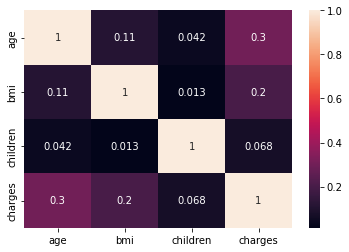

In [25]:
sns.heatmap(data.corr(),annot=True)

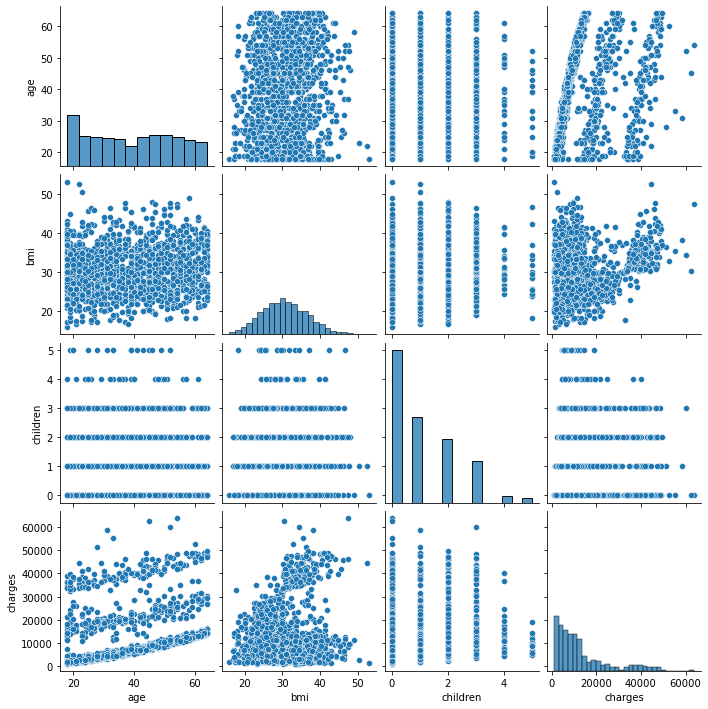

In [26]:
sns.pairplot(data)

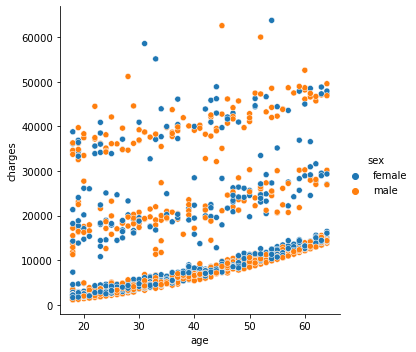

In [27]:
sns.relplot(x="age",y="charges",hue="sex",data=data)

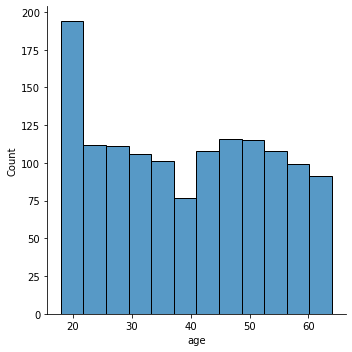

In [28]:
sns.displot(data["age"])

<AxesSubplot:xlabel='age', ylabel='Density'>

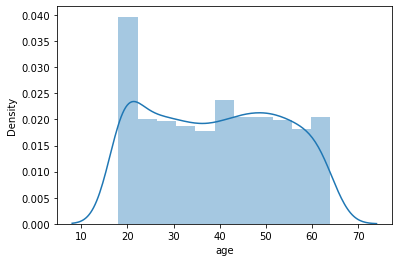

In [29]:
sns.distplot(data["age"])

<AxesSubplot:xlabel='age', ylabel='charges'>

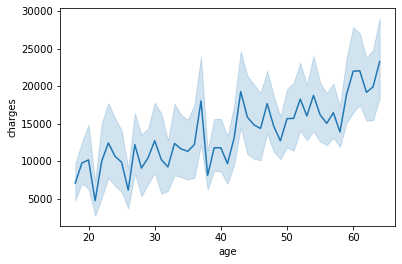

In [30]:
sns.lineplot(data["age"],data["charges"])

<AxesSubplot:xlabel='bmi'>

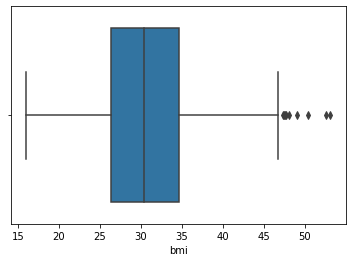

In [31]:
#boxplot
sns.boxplot(data["bmi"])

### Method to outlier detection

In [32]:
qnt=data.quantile(q=(0.25,0.75))
qnt

,age,bmi,children,charges
0.25,27.0,26.29625,0.0,4740.287150
0.75,51.0,34.69375,2.0,16639.912515


In [33]:
iqr=qnt.loc[0.75] -qnt.loc[0.25] # IQR=Q3-Q1
iqr

age            24.000000
bmi             8.397500
children        2.000000
charges     11899.625365
dtype: float64

In [34]:
lower=qnt.loc[0.25]-1.5*iqr
lower

age            -9.000000
bmi            13.700000
children       -3.000000
charges    -13109.150897
dtype: float64

In [35]:
upper =qnt.loc[0.75]+1.5*iqr
upper

age            87.000000
bmi            47.290000
children        5.000000
charges     34489.350562
dtype: float64

In [36]:
data.mean()

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

### replacing outlier

In [37]:
data["bmi"] =np.where(data["bmi"]>45,31,data["bmi"])

<AxesSubplot:xlabel='bmi'>

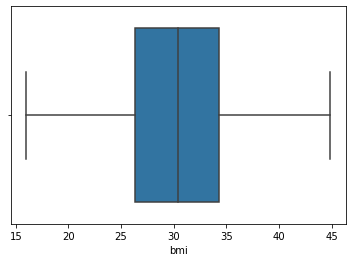

In [38]:
sns.boxplot(data["bmi"])

### encoding

In [39]:
data.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [40]:
data["sex"].replace({"female":0,"male":1},inplace=True)

In [41]:
data["smoker"].replace({"yes":1,"no":0},inplace=True)

In [42]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [43]:
data_main = pd.get_dummies(data,columns=["region"])

In [44]:
data_main.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


### separating X and Y values

In [60]:
# target parameter

In [46]:
y=data_main["charges"]

In [47]:
x=data_main.drop(columns =['charges'],axis=1)

### Scaling

In [48]:
names = x.columns

In [49]:
names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [50]:
from sklearn.preprocessing import scale

In [51]:
x1=scale(x)

In [52]:
x1

array([[-1.43876426, -1.0105187 , -0.43951908, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [-1.50996545,  0.98959079,  0.58590685, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-0.79795355,  0.98959079,  0.45139612, ..., -0.56641788,
         1.63579466, -0.56641788],
       ...,
       [-1.50996545, -1.0105187 ,  1.12394975, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-1.29636188, -1.0105187 , -0.80636652, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [ 1.55168573, -1.0105187 , -0.23513265, ...,  1.76548098,
        -0.61132367, -0.56641788]])

In [53]:
X=pd.DataFrame(x,columns=names)

In [54]:
X.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0


### Train test split

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [57]:
x_train.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
621,37,1,34.100,4,1,0,0,0,1
194,18,1,34.430,0,0,0,0,1,0
240,23,0,36.670,2,1,1,0,0,0
1168,32,1,35.200,2,0,0,0,0,1
1192,58,0,32.395,1,0,1,0,0,0


In [58]:
x_train.shape,y_train.shape

((1070, 9), (1070,))

In [59]:
x_test.shape,y_test.shape

((268, 9), (268,))

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lr=LinearRegression()

In [65]:
lr.fit(x,y)

LinearRegression()

In [67]:
prd=lr.predict(x_test)
prd

array([ 1.10885081e+04,  9.70906298e+03,  3.86745132e+04,  1.63796695e+04,
        6.70629377e+03,  3.80443501e+03,  1.56839291e+03,  1.47003376e+04,
        9.18034231e+03,  7.58728001e+03,  4.54966119e+03,  1.03404246e+04,
        8.78345789e+03,  3.83452686e+03,  2.80264419e+04,  1.10362816e+04,
        1.11312085e+04,  6.19813822e+03,  8.24348018e+03,  2.73842931e+04,
        3.38426511e+04,  1.45747741e+04,  1.18898548e+04,  3.25250102e+04,
        4.27318494e+03,  9.45422533e+03,  9.23230830e+02,  1.01954079e+04,
        3.83040196e+03,  1.04736552e+04,  9.15250945e+03,  4.07120918e+04,
        1.57101067e+04,  1.38829545e+04,  2.49036556e+04,  5.21324610e+03,
        1.29673678e+04,  3.10045572e+04,  3.39658165e+04,  3.60940924e+03,
        3.88161958e+03,  3.99467600e+03,  3.07293321e+04,  3.99521428e+04,
        2.83053642e+04,  5.21175798e+03,  1.09191031e+04,  7.72703484e+03,
        3.58256805e+03,  1.03546392e+04,  5.88412528e+03,  3.50771322e+03,
        3.31408149e+04,  

In [68]:
from sklearn.metrics import mean_squared_error,r2_score

In [72]:
mean_squared_error(y_test,prd)

32028945.284427833

In [73]:
r2_score(y_test,prd)

0.7987246096395607